In [50]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import uniform
from random import randint 
import random
import pandas as pd
from scipy.cluster.vq import kmeans,vq,whiten
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import time
from math import sqrt
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as ax1
import matplotlib.pyplot as ax2
import matplotlib.pyplot as ax3
import matplotlib.pyplot as ax4
import matplotlib.pyplot as ax5
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt_3d
from sklearn.ensemble import AdaBoostRegressor

In [51]:
#INITIALIZATION
population_size = 50
# population_size = 10
# max_generation = 10
max_generation = 100
# max_generation = 10
_lambda = 1.5
dimension = 2
max_domain = 1000
min_domain = 0
step_size_cons = 0.01
Pa = 0.25
learning_rates = []
n_estimators = []
test_mse = []

In [52]:
#OBJECTIVE FUNCTION
def rmse(path, X_train, y_train):
    n_es = path[0].astype(int)
    if(path[0].astype(int)==0):
        n_es = 1
    model = AdaBoostRegressor(learning_rate = path[1], n_estimators=n_es, random_state=1)
    model.fit(X_train, y_train)
    score = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    return score


In [53]:
#LEVY FLIGHT
def levy_flight(Lambda):
    sigma1 = np.power((math.gamma(1 + Lambda) * np.sin((np.pi * Lambda) / 2)) \
                      / math.gamma((1 + Lambda) / 2) * np.power(2, (Lambda - 1) / 2), 1 / Lambda)
    sigma2 = 1
    u = np.random.normal(0, sigma1, size=dimension)
    v = np.random.normal(0, sigma2, size=dimension)
    step = u / np.power(np.fabs(v), 1 / Lambda)

    return step

In [54]:
class Indivisual:
    def __init__(self):
# #          reading data from file
#         dataset = pd.read_csv('hidrat_data.csv')
#         X = dataset.iloc[:,[1,2,4,5]].values
#         Y = dataset.iloc[:,[3]].values
#         X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
#         X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)
#         st_x = StandardScaler()
#         self.X_train=st_x.fit_transform(X_train)
#         st_y = StandardScaler()
#         self.y_train=st_y.fit_transform(y_train)
#         X_test=st_x.fit_transform(X_test)
#         y_test=st_y.fit_transform(y_test)

# vector quantization
        dataset = pd.read_csv('hidrat_data.csv')
        dataset = dataset.iloc[:,[1,2,3,4,5]].values
 # whitening of data
#         dataset = whiten(dataset)
        scale = StandardScaler()
        dataset=scale.fit_transform(dataset)
# computing K-Means with K = 10 (10 clusters)
        centroids,_ = kmeans(dataset,10)
# assign each sample to a cluster
        clx,_ = vq(dataset,centroids)
# The coordinates of each data are replaced by the coordinates of the center of the cluster in train dataset
        dataset_vq = np.zeros((len(clx),centroids.shape[1]))
        for i in range(len(clx)):
            dataset_vq[i] = centroids[clx[i]]
        dataset_vq= scale.inverse_transform(dataset_vq)
        
        X = dataset_vq[:,[0,1,3,4]]
        Y = dataset_vq[:,[2]]

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
        self.X_train, X_val, self.y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)

        st_x = StandardScaler()
        self.X_train=st_x.fit_transform(self.X_train)
        st_y = StandardScaler()
        self.y_train = st_y.fit_transform(self.y_train)
        X_test=st_x.fit_transform(X_test)
        y_test=st_y.fit_transform(y_test)

        pos1 = np.random.rand(1) * (max_domain - min_domain) + min_domain
        pos2 = np.random.rand(1) * (max_domain - min_domain) + min_domain
#         pos2 = np.array(pos2)
#         p = 0
#         p = np.array(p)
#         p.astype(np.float64) 
        while(pos2 < 0.00000001):
            pos2 = np.random.rand(1) * (max_domain - min_domain) + min_domain
        while(pos1 < 0.00000001):
            pos1 = np.random.rand(1) * (max_domain - min_domain) + min_domain
#             pos2 = np.array(pos2)
#         print(pos2)
        self.__position = np.append(pos1,pos2)
        self.__fitness = rmse(self.__position,X_train, y_train)

    def get_position(self):
        return self.__position

    def get_fitness(self):
        return self.__fitness

    def set_position(self, position):
        self.__position = position

    def set_fitness(self, fitness):
        self.__fitness = fitness

    def abandon(self):
        # abandon some variables
        for i in range(len(self.__position)):
            p = np.random.rand()
            if p < Pa:
                pos1 = np.random.rand(1) * (max_domain - min_domain) + min_domain
                pos2 = np.random.rand(1) * (max_domain - min_domain) + min_domain
#                 pos2 = np.array(pos2)
#                 p = 0
#                 p = np.array(p)
#                 p.astype(np.float64)
                while(pos2 < 0.00000001):
                    pos2 = np.random.rand(1) * (max_domain - min_domain) + min_domain
                while(pos1 < 0.00000001):
                    pos1 = np.random.rand(1) * (max_domain - min_domain) + min_domain
#                     pos2 = np.array(pos2)
#                 print(pos2)
                self.__position = np.append(pos1,pos2)
#                 self.__position[i] = np.random.rand() * (max_domain - min_domain) + min_domain
        self.__fitness = rmse(self.__position,self.X_train,self.y_train)

In [55]:
def main():
    
    
    
    t_array = []
    best_fit_array = []
    test_acc = []
    train_acc = []
# #     # reading data from file
#     dataset = pd.read_csv('hidrat_data.csv')
#     X = dataset.iloc[:,[1,2,4,5]].values
#     Y = dataset.iloc[:,[3]].values
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)
#     st_x = StandardScaler()
#     X_train=st_x.fit_transform(X_train)
#     st_y = StandardScaler()
#     y_train=st_y.fit_transform(y_train)
#     X_test=st_x.fit_transform(X_test)
#     y_test=st_y.fit_transform(y_test)

# vector quantization
    dataset = pd.read_csv('hidrat_data.csv')
    dataset = dataset.iloc[:,[1,2,3,4,5]].values
 # whitening of data
#     dataset = whiten(dataset)
    scale = StandardScaler()
    dataset=scale.fit_transform(dataset)
    
# computing K-Means with K = 10 (10 clusters)
    centroids,_ = kmeans(dataset,10)
# assign each sample to a cluster
    clx,_ = vq(dataset,centroids)
# The coordinates of each data are replaced by the coordinates of the center of the cluster in train dataset
    dataset_vq = np.zeros((len(clx),centroids.shape[1]))
    for i in range(len(clx)):
        dataset_vq[i] = centroids[clx[i]]
    dataset_vq= scale.inverse_transform(dataset_vq)
    
    X = dataset_vq[:,[0,1,3,4]]
    Y = dataset_vq[:,[2]]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)
    
    st_x = StandardScaler()
    X_train=st_x.fit_transform(X_train)
    st_y = StandardScaler()
    y_train=st_y.fit_transform(y_train)
    X_test=st_x.fit_transform(X_test)
    y_test=st_y.fit_transform(y_test)
    
    print(len(y_test))
    #CS
    #RANDOMLY CREATING HOSTS
    cs_list = []
    for i in range(population_size):
        cs_list.append(Indivisual())


    #SORT TO GET THE BEST FITNESS
    cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

    best_fitness = cs_list[0].get_fitness()
    best_position = cs_list[0].get_position()

#     fig = plt.figure()

#     #INITIAL POPULATION DISTRIBUTION
# #     ax1 = fig.add_subplot(131)
#     for i in range(population_size):
#         ax1.scatter([cs_list[i].get_position()[0]], [cs_list[i].get_position()[1]])
#     ax1.title('Initial Population Distributtion')
#     ax1.xlabel('number of estimators')
#     ax1.ylabel('learning rate')
#     ax1.show()

#     ax3 = fig.add_subplot(133)
#     ax4 = fig.add_subplot(133)

    t = 1
#     while(best_fitness > 0.009):
    model_predict = []
    learning_rates = []
    n_estimators = []
    while(t < max_generation):
        model_predict = []
        #GENERATING NEW SOLUTIONS
        for i in range(population_size):

            #CHOOSING A RANDOM CUCKOO (say i)
            i = np.random.randint(low=0, high=population_size)

            #SETTING ITS POSITION USING LEVY FLIGHT
            position = cs_list[i].get_position()+(step_size_cons*levy_flight(_lambda))
           

            # Simple Boundary Rule
#             for i in range(len(position)):
            if position[0] > max_domain:
                position[0] = max_domain
            if position[0] < 0.00000001:
                position[0] = 0.00000001
                
#             if position[1] > 1:
#                 position[1] = 1
            if position[1] > max_domain:
                position[1] = max_domain
            if position[1] < 0.00000001:
                position[1] = 0.00000001
            
            

            cs_list[i].set_position(position)
            cs_list[i].set_fitness(rmse(cs_list[i].get_position(),X_train,y_train))

            #CHOOSING A RANDOM HOST (say j)
            j = np.random.randint(0, population_size)
            while j == i:  # random id[say j] ≠ i
                j = np.random.randint(0, population_size)

            #RELAXATION
            if cs_list[j].get_fitness() > cs_list[i].get_fitness():
                cs_list[j].set_position(cs_list[i].get_position())
                cs_list[j].set_fitness(cs_list[i].get_fitness())

        #SORT (to Keep Best)
        cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

        #ABANDON SOLUTION (exclude the best)
        for a in range(1, population_size):
            r = np.random.rand()
            if (r < Pa):
                cs_list[a].abandon()

        #RANKING THE CS LIST
        cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

        #FIND THE CURRENT BEST
        if cs_list[0].get_fitness() < best_fitness:
            best_fitness = cs_list[0].get_fitness()
            best_position = cs_list[0].get_position()
            
            
#       mse for test set
        
        n_es = best_position[0].astype(int)
        if(best_position[0].astype(int)==0):
            n_es = 1
        model = AdaBoostRegressor(learning_rate = best_position[1], n_estimators=n_es, random_state=1)
        model.fit(X_train, y_train)
        model_predict = model.predict(X_test)
        test_MSE = sqrt(mean_squared_error(y_test, model.predict(X_test)))
        train_r2 = r2_score(y_train, model.predict(X_train))
        test_r2 = r2_score(y_test, model.predict(X_test))
        test_acc.append(test_r2)
        train_acc.append(train_r2)
        print(test_MSE)
        test_mse.append(test_MSE)
        learning_rates.append(best_position[1])
        n_estimators.append(n_es)
        
        
        #PRINTING SOLUTION IN EACH ITERATION
        print("iteration =", t, " best_fitness =", best_fitness,"train_acc",train_r2,"pos=", best_position,"test =",test_MSE, "test_acc=",test_r2)

#       mse for test set plotting
#         
        
        
#         fig = plt.figure()
#         ax3 = fig.add_subplot(111, projection='3d')
        t_array.append(t)
        best_fit_array.append(best_fitness)
#         #FITNESS PLOTTING
#         ax3.scatter(t, best_fitness)

        t += 1
    
    
    #GRAPH FOR FITNESS
    ax3.plot(t_array,best_fit_array, label='train RMSE')
    ax3.plot(t_array,train_acc, label = 'train R^2')
    ax3.title('train RMSE/R^2')
    ax3.xlabel('iteration')
    ax3.ylabel('RMSE/R^2')
    ax3.legend()
    ax3.show()
    #GRAPH FOR FITNESS
#     print(test_mse)
#     for i in range(len(test_mse)):
    ax4.plot(t_array, test_mse, label = 'test RMSE')
    ax4.plot(t_array, test_acc, label='test R^2')
    ax4.title('test RMSE/R^2')
    ax4.xlabel('iteration')
    ax4.ylabel('RMSE/R^2')
    ax4.legend()
    ax4.show()
    
    
    model_predict = st_y.inverse_transform(model_predict)
    y_test2 = st_y.inverse_transform(y_test)
    
    cross = []
    i = 250
    while i!=1500:
        cross.append(i)
        i = i+1
    ax5.plot(cross,cross, color='black')
    ax5.plot(y_test2,model_predict,'bo',markersize=5, color='blue')
    # ax5.plot(y_train,model_predict_train,'bo', markersize=3,label='Train Data', color='red',marker = '<')
    ax5.title('Cross plot for CS-VQ-AdaBoost.R2 model')
    ax5.xlabel('Actual value')
    ax5.ylabel('Predicted value')
    ax5.legend()
    ax5.show()
    
    test_num = []
    for i in range(len(y_test)):
        test_num.append(i)
    test_num = test_num[::20]
    model_predict2=model_predict[::20]
    y_test_each20 = y_test2[::20]
    fig = plt.figure(figsize=(30, 10))
    ax2 = fig.add_subplot(111)
    ax2.plot(test_num,model_predict2, label='Predicted value')
    ax2.scatter(test_num,y_test_each20 , label = 'Actual value',color= 'red')
    ax2.set_title('Comparison of actual values with predected values for the CS-VQ-AdaBoost.R2 model')
    ax2.set_xlabel('Data number',size=20)
    ax2.set_ylabel('Pressure (Psi)', size=20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    ax2.legend()
    fig.show()



#     fig6 = plt_3d.figure(figsize=(10, 10))
#     ax6 = fig6.add_subplot(111, projection='3d')
#     img = ax6.scatter(x1, x2, x3 ,cmap=plt_3d.hot())
#     ax6.set_xlabel('learning rate')
#     ax6.set_ylabel('number of estimators')
#     ax6.set_zlabel('mean square error')
# # ax6.set_zlim([0,400])
#     ax6.legend()
# # cbar = fig6.colorbar(img)
# # cbar.ax.set_ylabel('mean square error', rotation=270)

#     plt_3d.show()


    # print(len(gammas))
# print(len(c_values))
# print(len(epsilons))
    from matplotlib import cm
    x1 = np.asarray(learning_rates)
    x2 = np.asarray(n_estimators)
# x3 =  np.asarray(epsilons)
    X1, X2 = np.meshgrid(x1, x2)
    X3 = []
    for i in range(len(X1)):
        x3 = []
        for j in range(len(X1)):
            if i ==j:
                x3.append(test_acc[i])
            else:
                x3.append(0)
        X3.append(x3)

    X3 = np.asarray(X3)
# ax6.set_zlim([-10,1000])
    import matplotlib

    fig6 = plt_3d.figure(figsize=(8, 8))
    ax6 = plt_3d.axes(projection='3d')
    surf = ax6.plot_surface(X1, X2, X3,rstride=1, edgecolor='none',cstride=1,shade=False,cmap=cm.coolwarm,antialiased=False)

    ax6.set_xlabel('learning rate')
    ax6.set_ylabel('number of estimators')
    ax6.set_zlabel('test accuracy')
# ax6.view_init(45,60)
    ax6.legend()
    plt_3d.show()

    
#     fig4 = plt_3d.figure()
#     ax6 = plt_3d.axes(projection="3d")


#     x_ = np.concatenate((np.asarray(learning_rates), np.asarray(learning_rates)[::-1]))
#     y_ = np.concatenate((np.asarray(n_estimators), np.asarray(n_estimators)[::-1]))
# #     y_ = np.asarray(n_estimators)
    
#     print(len(x_))
#     print(len(y_))
# #     X_, Y_ = np.meshgrid(x_, y_)
#     Z = np.concatenate((np.asarray(test_mse), np.asarray(test_mse)[::-1]))
# #     Z = np.asarray(test_mse)
# #     ax6.plot_wireframe(X_, Y_, Z, color='green')
    
#     ax6.plot_trisurf(x_, y_, Z,linewidth=0, antialiased=True)
#     ax6.set_xlabel('Learning rate')
#     ax6.set_ylabel('Number of estimators')
#     ax6.set_zlabel('Mean square error')
#     ax6.legend()
#     fig4.show()
#     test_mse.append(test_MSE)
#     learning_rates.append(best_position[1])
#     n_estimators.append(n_es)
        
    
#     # FINAL POPULATION DISTRIBUTION
# #     ax2 = fig.add_subplot(132)
#     for i in range(population_size):
#         ax2.scatter([cs_list[i].get_position()[0]], [cs_list[i].get_position()[1]])
#     ax2.title('Final Population Distributtion after '+str(t)+' iterations')
#     ax2.xlabel('number of estimators')
#     ax2.ylabel('learning rate')

#     #SHOWING GRAPH
#     ax2.show()
    
    

2613


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

1.0138859488120981
iteration = 1  best_fitness = 1.0007420597710766 train_acc -0.027964717198608824 pos= [735.26357817  45.69996002] test = 1.0138859488120981 test_acc= -0.02796471719860838


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

1.0138859488120981
iteration = 2  best_fitness = 1.0007420597710766 train_acc -0.027964717198608824 pos= [735.26357817  45.69996002] test = 1.0138859488120981 test_acc= -0.02796471719860838


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.7316186054499416
iteration = 3  best_fitness = 0.7343816471668485 train_acc 0.4606835963045063 pos= [154.81378871   9.08643545] test = 0.7316186054499416 test_acc= 0.46473421615948296


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4954042634630793
iteration = 4  best_fitness = 0.5035504430444963 train_acc 0.7464369513096915 pos= [212.0598599   19.80079959] test = 0.4954042634630793 test_acc= 0.7545746157426041


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.44012846884967516
iteration = 5  best_fitness = 0.44621891591506463 train_acc 0.8008886790795844 pos= [212.06167344  19.79305477] test = 0.44012846884967516 test_acc= 0.8062869309080406


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 6  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 7  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 8  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 9  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 10  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 11  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 12  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 13  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 14  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 15  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 16  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 17  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 18  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 19  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 20  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 21  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 22  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 23  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 24  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 25  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 26  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 27  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 28  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 29  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 30  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 31  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 32  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 33  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 34  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 35  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 36  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 37  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 38  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 39  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 40  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 41  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 42  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 43  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 44  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 45  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 46  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 47  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 48  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 49  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 50  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 51  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 52  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 53  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 54  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 55  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 56  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 57  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 58  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 59  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 60  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 61  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 62  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 63  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 64  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 65  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 66  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 67  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 68  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 69  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 70  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 71  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 72  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 73  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 74  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 75  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 76  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 77  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 78  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 79  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 80  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 81  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 82  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 83  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 84  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 85  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 86  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 87  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 88  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.4241247436822347
iteration = 89  best_fitness = 0.4293276366556856 train_acc 0.8156777804036436 pos= [212.09103684  19.78149417] test = 0.4241247436822347 test_acc= 0.8201182017964788


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18940129635625086
iteration = 90  best_fitness = 0.1978733817904531 train_acc 0.9604137205521124 pos= [7.97043429e+02 9.88300748e-02] test = 0.18940129635625086 test_acc= 0.9641271489385717


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18940129635625086
iteration = 91  best_fitness = 0.1978733817904531 train_acc 0.9604137205521124 pos= [7.97043429e+02 9.88300748e-02] test = 0.18940129635625086 test_acc= 0.9641271489385717


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18940129635625086
iteration = 92  best_fitness = 0.1978733817904531 train_acc 0.9604137205521124 pos= [7.97043429e+02 9.88300748e-02] test = 0.18940129635625086 test_acc= 0.9641271489385717


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18940129635625086
iteration = 93  best_fitness = 0.1978733817904531 train_acc 0.9604137205521124 pos= [7.97043429e+02 9.88300748e-02] test = 0.18940129635625086 test_acc= 0.9641271489385717


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18937780730664727
iteration = 94  best_fitness = 0.1969859196295965 train_acc 0.9604235931232197 pos= [7.97147541e+02 2.48136297e-02] test = 0.18937780730664727 test_acc= 0.9641360460997264


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18937780730664727
iteration = 95  best_fitness = 0.1969859196295965 train_acc 0.9604235931232197 pos= [7.97147541e+02 2.48136297e-02] test = 0.18937780730664727 test_acc= 0.9641360460997264


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18937780730664727
iteration = 96  best_fitness = 0.1969859196295965 train_acc 0.9604235931232197 pos= [7.97147541e+02 2.48136297e-02] test = 0.18937780730664727 test_acc= 0.9641360460997264


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.1894091899671264
iteration = 97  best_fitness = 0.1892672826540161 train_acc 0.9604125697246348 pos= [7.97056501e+02 4.92006222e-02] test = 0.1894091899671264 test_acc= 0.964124158755997


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18938380082117115
iteration = 98  best_fitness = 0.1324531845706456 train_acc 0.9604280239234682 pos= [7.97038304e+02 1.43590984e-01] test = 0.18938380082117115 test_acc= 0.9641337759865269


C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d ar

0.18938380082117115
iteration = 99  best_fitness = 0.1324531845706456 train_acc 0.9604280239234682 pos= [7.97038304e+02 1.43590984e-01] test = 0.18938380082117115 test_acc= 0.9641337759865269


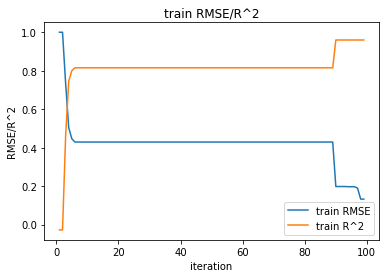

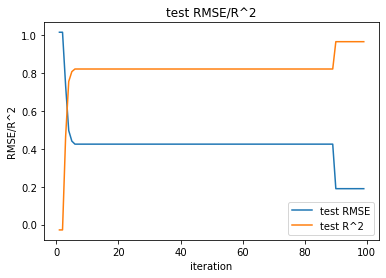

No handles with labels found to put in legend.


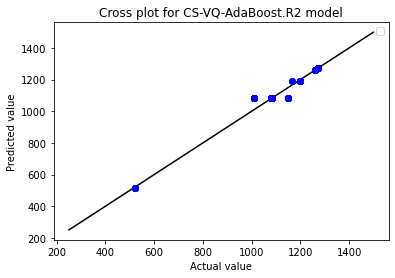

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\ipykernel_launcher.py:234: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
No handles with labels found to put in legend.


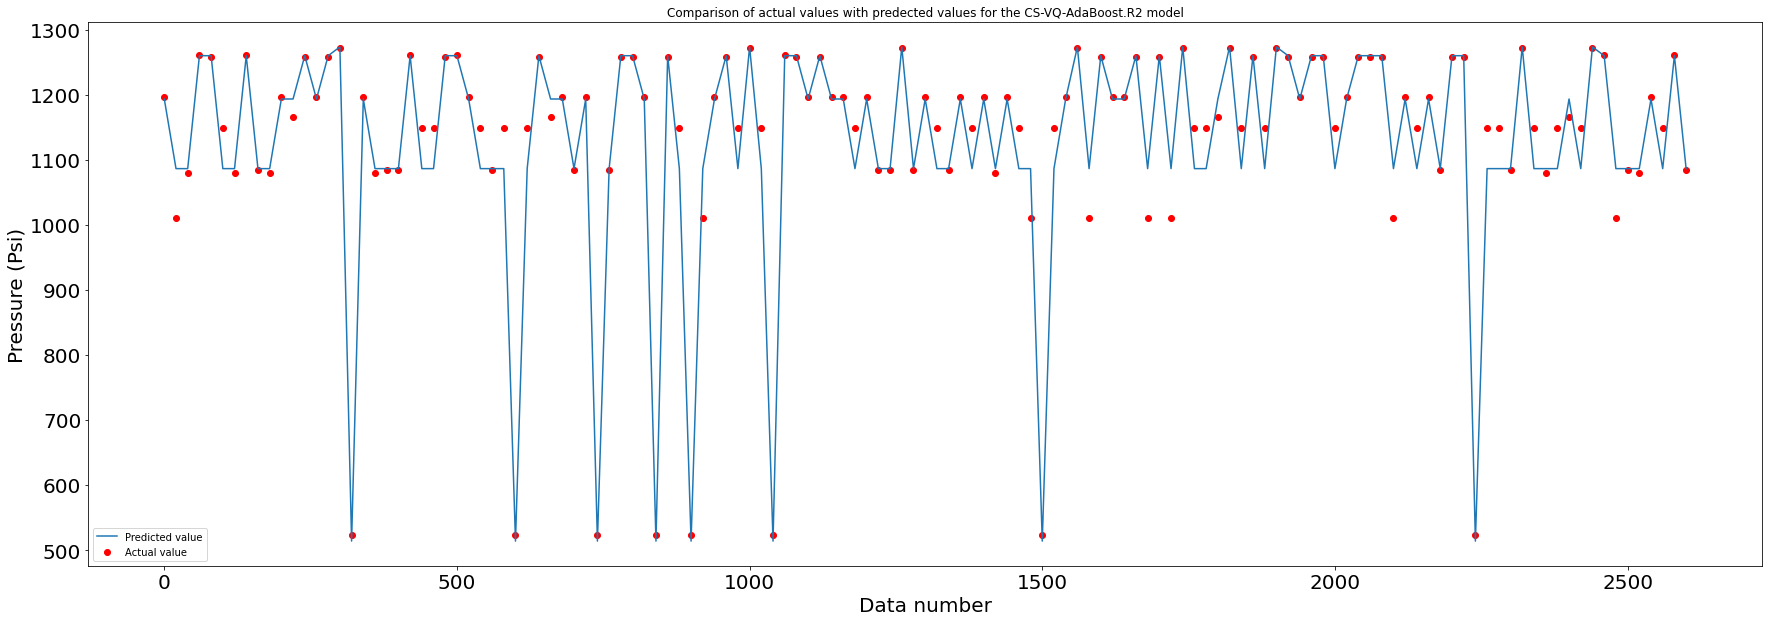

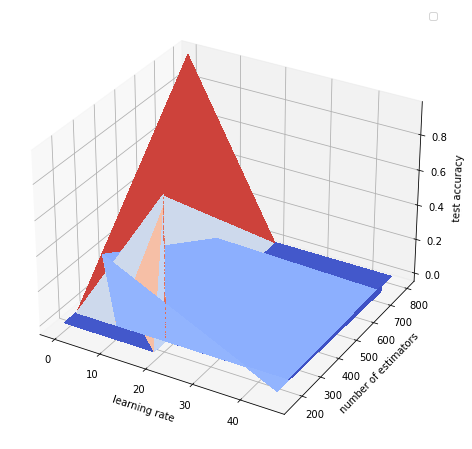

In [56]:
if __name__ == "__main__":
    main()